<a href="https://colab.research.google.com/github/erenacid/dtsc-1302-group-17/blob/main/DTSC1302.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
url = "https://raw.githubusercontent.com/erenacid/dtsc-1302-group-17/refs/heads/main/College_Data_17.csv"
df = pd.read_csv(url)
df['Cost']=df['Outstate']+df['Room.Board']+df["Books"]+df["Personal"]
df['Undergrad']=df['P.Undergrad']+df['F.Undergrad']
df['Enrollment']=df['Enroll']/df['Accept']
df['Acceptance']=df['Accept']/df['Apps']
df= df.drop(['Outstate', 'Room.Board', 'Books', 'Personal', 'Terminal','F.Undergrad','P.Undergrad','Top10perc','Apps','Accept','Enroll'], axis=1)
df.head(5)

,Unnamed: 0,Private,Top25perc,PhD,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cost,Undergrad,Enrollment,Acceptance
0,Abilene Christian University,Yes,52,70,18.1,12,7041,60,13390,3422,0.585227,0.742169
1,Adelphi University,Yes,29,29,12.2,16,10527,56,20980,3910,0.266112,0.880146
2,Adrian College,Yes,50,53,12.9,30,8735,54,16565,1135,0.306290,0.768207
3,Agnes Scott College,Yes,89,92,7.7,37,19016,59,19735,573,0.392550,0.836930
4,Alaska Pacific University,Yes,44,76,11.9,2,10922,15,13980,1118,0.376712,0.756477


Text(0.5, 1.0, 'Raw Scatterplot for Expenditure and Cost')

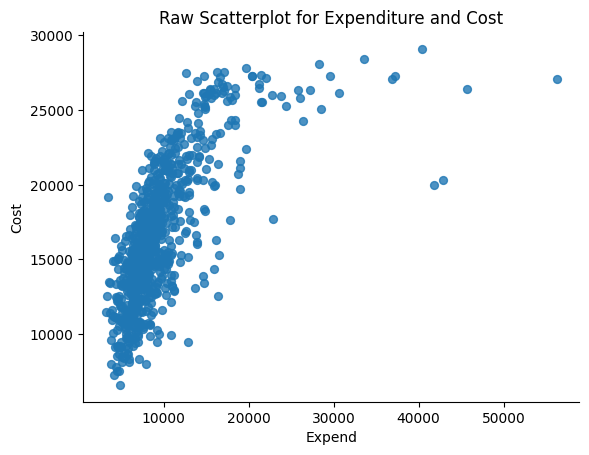

In [60]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Expend', y='Cost', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title("Raw Scatterplot for Expenditure and Cost")

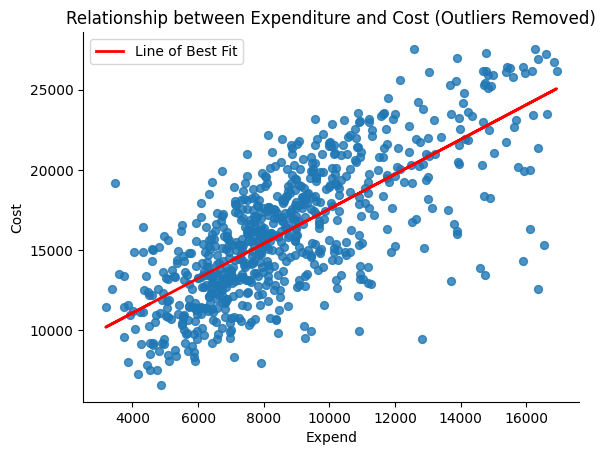

In [61]:
from matplotlib import pyplot as plt

# Calculate the Interquartile Range (IQR) for 'Expend'
Q1 = df['Expend'].quantile(0.25)
Q3 = df['Expend'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds to identify outliers
upper_bound = Q3 + 1.5 * IQR
# Filter data to exclude outliers
filtered_df = df[df['Expend'] <= upper_bound]

# Create the scatter plot with the filtered data
filtered_df.plot(kind='scatter', x='Expend', y='Cost', s=32, alpha=.8)
plt.gca().spines[['top', 'right']].set_visible(False)

# Fit and plot the regression line for the filtered data
m, b = np.polyfit(filtered_df['Expend'], filtered_df['Cost'], 1)
plt.plot(filtered_df['Expend'], m * filtered_df['Expend'] + b, color='red', linewidth=2, label='Line of Best Fit')

plt.legend()  # Add a legend to the plot
plt.title("Relationship between Expenditure and Cost (Outliers Removed)")
plt.show()

In [ ]:
!git clone https://github.com/erenacid/dtsc-1302-group-17.git
%cd dtsc-1302-group-17
df = pd.read_csv("College_Data_17.csv")

Cloning into 'dtsc-1302-group-17'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (12/12), 1.94 MiB | 9.07 MiB/s, done.
Resolving deltas: 100% (1/1), done.
/content/dtsc-1302-group-17


,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


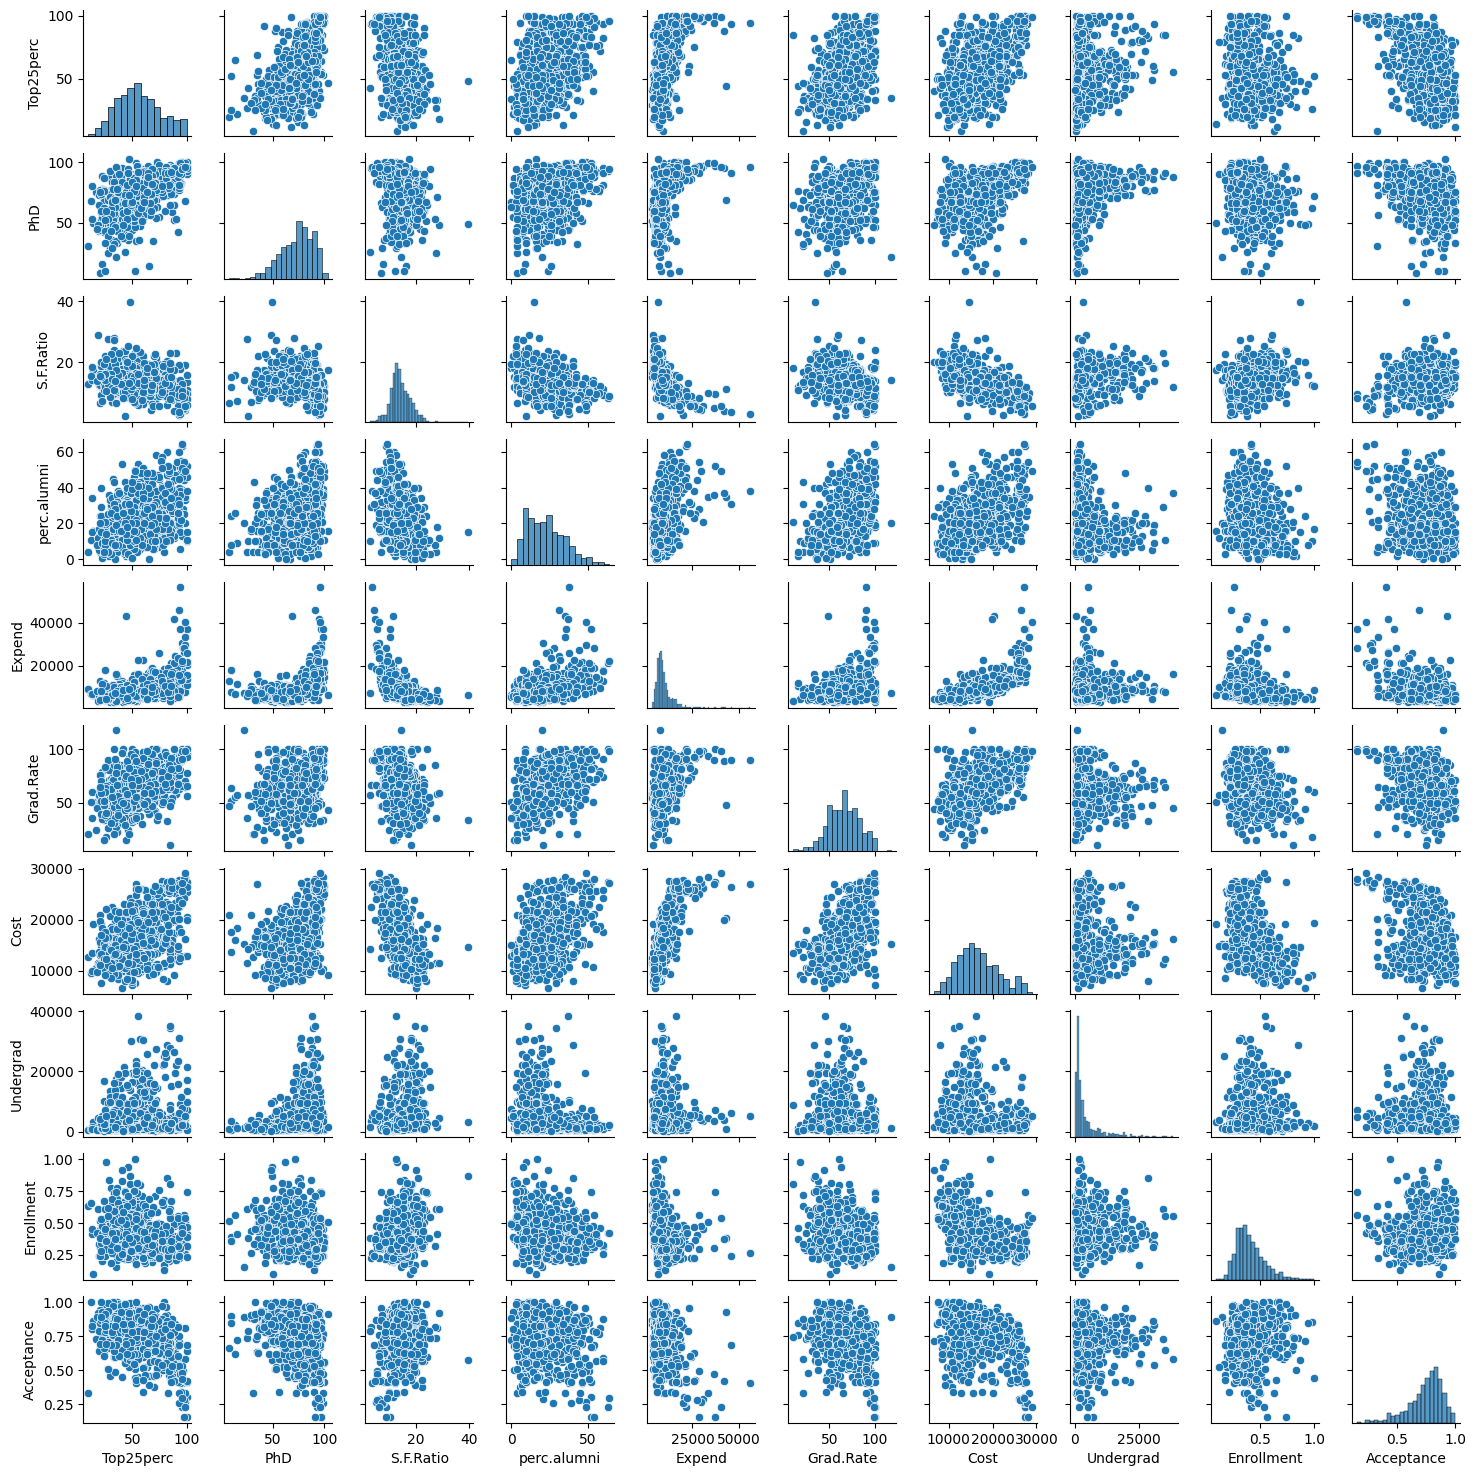

In [62]:
#Scatterplots
sns.pairplot(df, height=1.5)
plt.show()

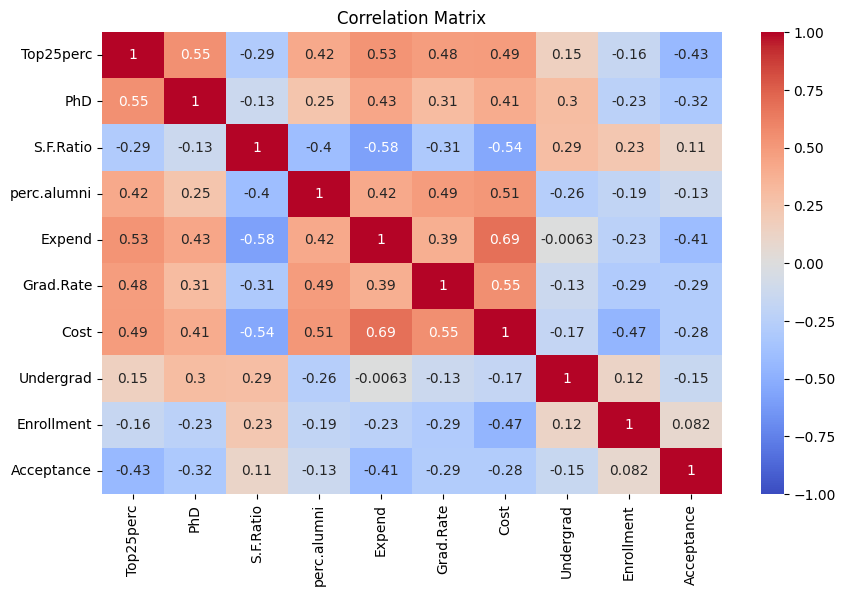

        Top25perc         PhD   S.F.Ratio  perc.alumni        Expend  \
count  777.000000  777.000000  777.000000   777.000000    777.000000   
mean    55.796654   72.660232   14.089704    22.743887   9660.171171   
std     19.804778   16.328155    3.958349    12.391801   5221.768440   
min      9.000000    8.000000    2.500000     0.000000   3186.000000   
25%     41.000000   62.000000   11.500000    13.000000   6751.000000   
50%     54.000000   75.000000   13.600000    21.000000   8377.000000   
75%     69.000000   85.000000   16.500000    31.000000  10830.000000   
max    100.000000  103.000000   39.800000    64.000000  56233.000000   

       Grad.Rate          Cost     Undergrad  Enrollment  Acceptance  
count  777.00000    777.000000    777.000000  777.000000  777.000000  
mean    65.46332  16688.218790   4555.205920    0.412015    0.746928  
std     17.17771   4675.340968   5854.075364    0.133989    0.147104  
min     10.00000   6604.000000    142.000000    0.099754    0.15448

In [63]:
# Correlation Matrix
plt.figure(figsize= (10,6))
numerical_df = df.select_dtypes(include=np.number)

sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

# Generate summary statistics
summary_stats = numerical_df.describe()

# Display the summary statistics
print(summary_stats)

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 1. Select Predictor Variables from Heatmap:
# Replace with the actual column names from your heatmap
predictor_variables = ['Expend', 'Undergrad','Acceptance']
X = df[predictor_variables]

# 2. Calculate VIF for Each Predictor:
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# 3. Display VIF Values:
print(vif_data)

     Variable       VIF
0      Expend  3.197420
1   Undergrad  1.531374
2  Acceptance  3.419674


In [76]:
formula = 'Cost ~ Expend + Undergrad + Acceptance'

# Create and fit the model
model = smf.ols(formula=formula, data=df).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Cost   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     258.5
Date:                Sun, 08 Dec 2024   Prob (F-statistic):          3.80e-116
Time:                        21:19:50   Log-Likelihood:                -7397.8
No. Observations:                 777   AIC:                         1.480e+04
Df Residuals:                     773   BIC:                         1.482e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.238e+04    830.902     14.901      0.0

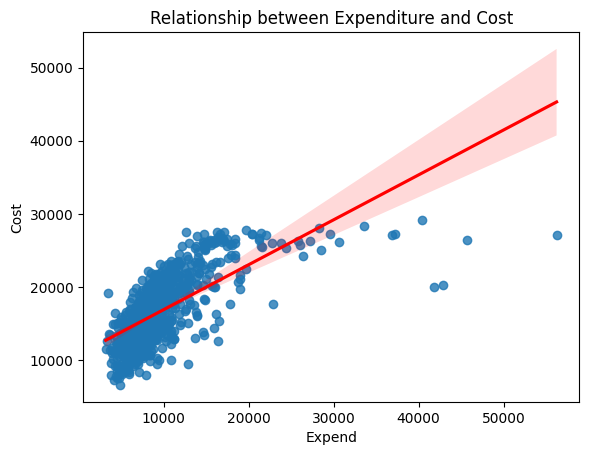

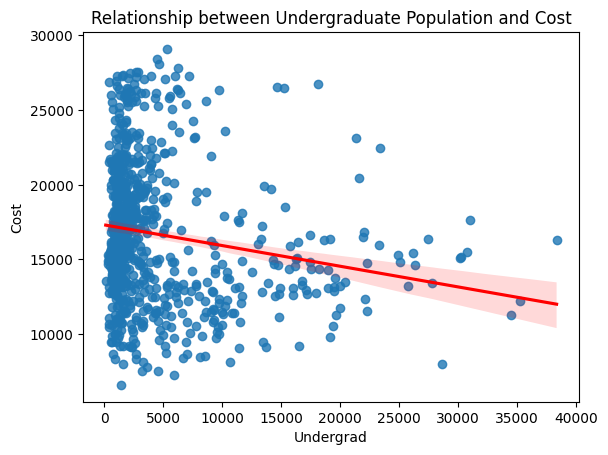

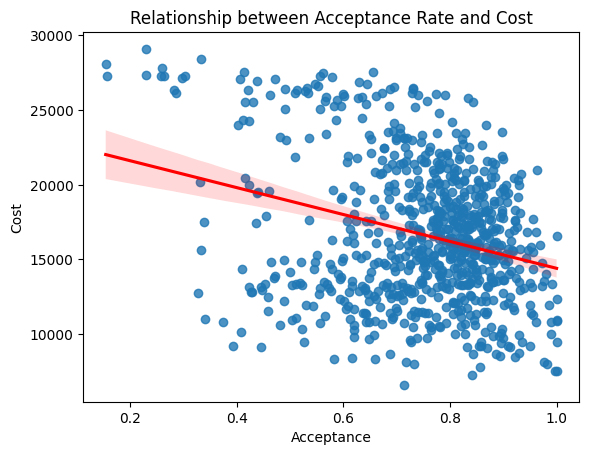

In [77]:
# Scatter plot for 'Expend' vs. 'Cost'
sns.regplot(x='Expend', y='Cost', data=df, line_kws={"color": "red"})
plt.title("Relationship between Expenditure and Cost")
plt.show()

# Scatter plot for 'Undergrad' vs. 'Cost'
sns.regplot(x='Undergrad', y='Cost', data=df, line_kws={"color": "red"})
plt.title("Relationship between Undergraduate Population and Cost")
plt.show()

# Scatter plot for 'Acceptance' vs. 'Cost'
sns.regplot(x='Acceptance', y='Cost', data=df, line_kws={"color": "red"})
plt.title("Relationship between Acceptance Rate and Cost")
plt.show()

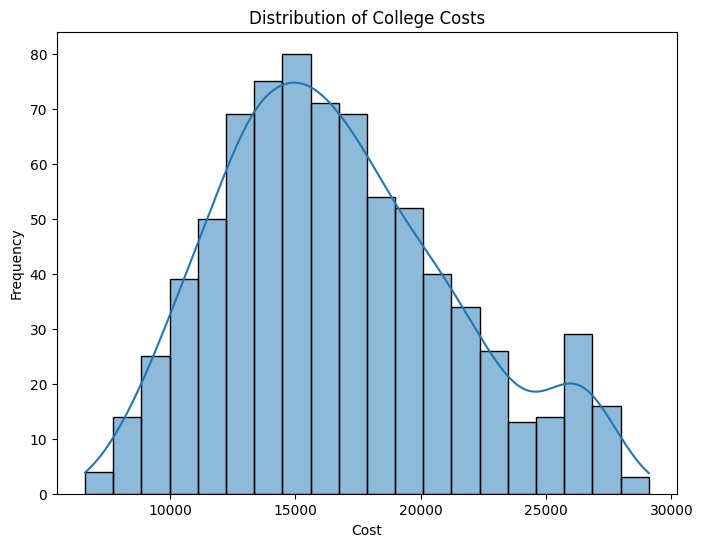

In [48]:
# Create a histogram of the 'Cost' variable
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.histplot(df['Cost'], bins=20, kde=True)  # Use seaborn for a nicer histogram
plt.title('Distribution of College Costs')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.show()

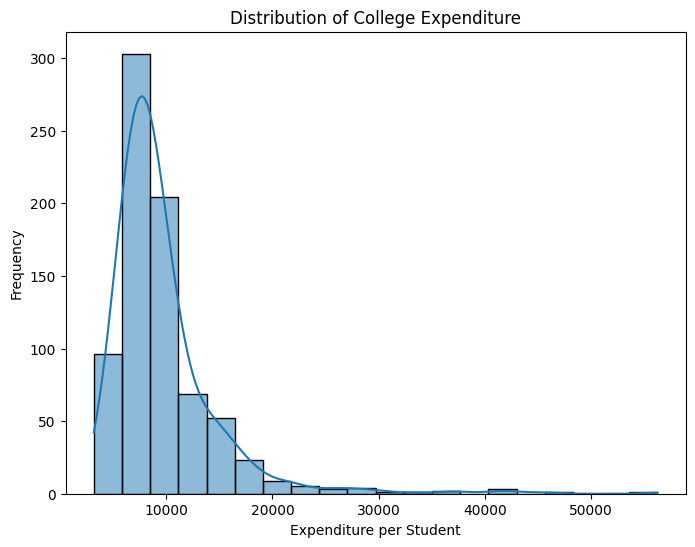

In [50]:
# Create a histogram of the 'Expend' variable
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.histplot(df['Expend'], bins=20, kde=True)
plt.title('Distribution of College Expenditure')
plt.xlabel('Expenditure per Student')
plt.ylabel('Frequency')
plt.show()

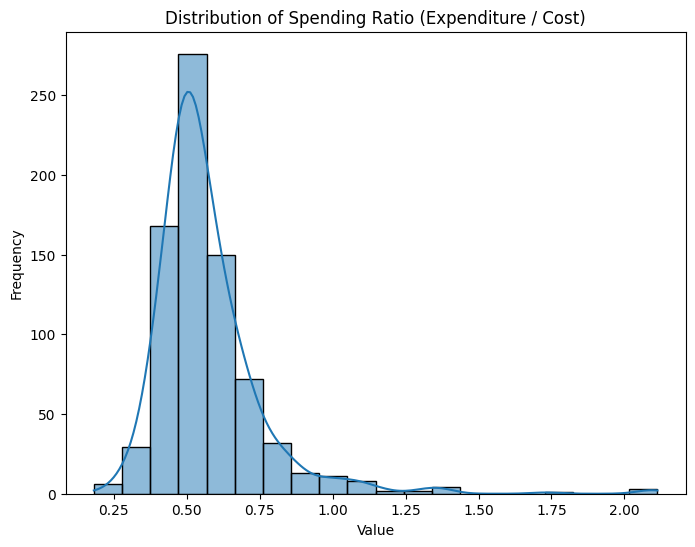

In [56]:
# 1. Create the 'Value' column:
df['Value'] = df['Expend'] / df['Cost']

# 2. Visualize the distribution of 'Value':
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.histplot(df['Value'], bins=20, kde=True)
plt.title('Distribution of Spending Ratio (Expenditure / Cost)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()